In [122]:
import pandas as pd


In [123]:
df=pd.read_csv("drug200.csv")
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
7,41,M,LOW,HIGH,11.037,drugC
91,41,M,HIGH,NORMAL,15.156,drugY
160,30,F,NORMAL,HIGH,10.443,drugX
101,45,F,HIGH,HIGH,12.854,drugA
121,15,M,HIGH,NORMAL,17.206,drugY


In [124]:
df['Sex']=df['Sex'].replace("M",1)
df['Sex']=df['Sex'].replace("F",2)

df['BP']=df['BP'].replace("HIGH",1)
df['BP']=df['BP'].replace("LOW",2)
df['BP']=df['BP'].replace("NORMAL",3)

df['Cholesterol']=df['Cholesterol'].replace("NORMAL",2)
df['Cholesterol']=df['Cholesterol'].replace("HIGH",1)

In [125]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,1,1,25.355,drugY
1,47,1,2,1,13.093,drugC
2,47,1,2,1,10.114,drugC
3,28,2,3,1,7.798,drugX
4,61,2,2,1,18.043,drugY


In [126]:
df.shape

(200, 6)

In [127]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [128]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [129]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### Now Split the data

In [130]:
y=df['Drug']
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [131]:
X=df.drop('Drug' , axis=1)
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,2,1,1,25.355
1,47,1,2,1,13.093
2,47,1,2,1,10.114
3,28,2,3,1,7.798
4,61,2,2,1,18.043


In [132]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier().fit(X,y)

model.predict([[61,2,2,1,18.043]])

C:\Users\no name\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)

### import librabies for accuracy score

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

predicted_values = model.predict(X_test)
predicted_values

## check score

score = accuracy_score(y_test,predicted_values)
score

1.0

### make a tree 

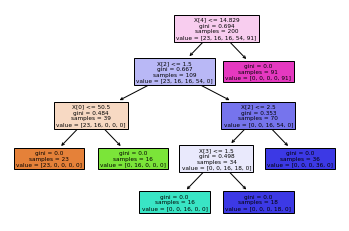

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model=DecisionTreeClassifier().fit(X,y)
plot_tree(model,filled=True)
plt.show()